# EDA

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
from Scrapper import extract_imdb_reviews

In [16]:
# Scrape the reviews
url = "https://www.imdb.com/title/tt16311594/reviews/"
reviews = extract_imdb_reviews(url)

In [17]:
# for i, review in enumerate(reviews[:5], 1):
#     print(f"{i}. {review}\n")

In [18]:
len(reviews)

294

In [19]:
df = pd.DataFrame(np.array(reviews), columns=['Reviews'])

In [20]:
df.head()

,Reviews
0,"Firstly, the music. Oh boy!I came expecting en..."
1,...and I went into this expecting a Hollywood ...
2,F1 has you on the edge of your seat 100% of th...
3,Just got out of the theater. It was a full the...
4,"As a longtime F1 fan, F1: The Movie completely..."


In [26]:
df['Word Count'] = df['Reviews'].apply(lambda x: len(x.split()))

In [27]:
df.head()

,Reviews,Word Count
0,"Firstly, the music. Oh boy!I came expecting en...",297
1,...and I went into this expecting a Hollywood ...,123
2,F1 has you on the edge of your seat 100% of th...,109
3,Just got out of the theater. It was a full the...,147
4,"As a longtime F1 fan, F1: The Movie completely...",155


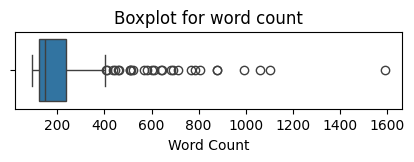

In [32]:
plt.figure(figsize=(5,1))
plt.title('Boxplot for word count')
sns.boxplot(data = df, x = 'Word Count')
plt.show()

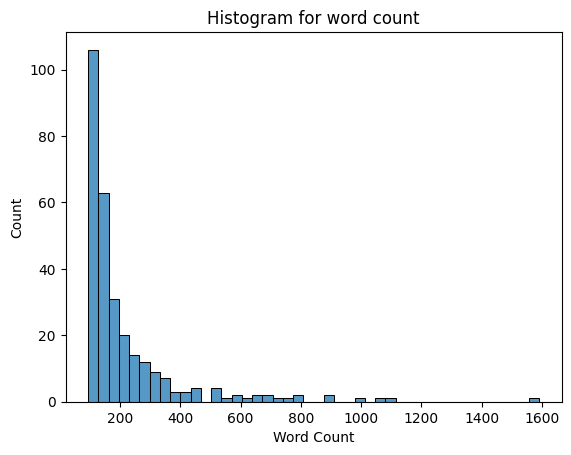

In [36]:
plt.title('Histogram for word count')
sns.histplot(data = df, x = 'Word Count')
plt.show()

## Counting Stopwords

In [37]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------- ----- 1.3/1.5 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 7.6 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [regex]
   ---------------------------------------- 0/2 [regex]
   ---------------------------------------- 0/2 [regex]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   --

In [38]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\octam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [40]:
stopwords.words('english'),len(stopwords.words('english'))

(['a',
  'about',
  'above',
  'after',
  'again',
  'against',
  'ain',
  'all',
  'am',
  'an',
  'and',
  'any',
  'are',
  'aren',
  "aren't",
  'as',
  'at',
  'be',
  'because',
  'been',
  'before',
  'being',
  'below',
  'between',
  'both',
  'but',
  'by',
  'can',
  'couldn',
  "couldn't",
  'd',
  'did',
  'didn',
  "didn't",
  'do',
  'does',
  'doesn',
  "doesn't",
  'doing',
  'don',
  "don't",
  'down',
  'during',
  'each',
  'few',
  'for',
  'from',
  'further',
  'had',
  'hadn',
  "hadn't",
  'has',
  'hasn',
  "hasn't",
  'have',
  'haven',
  "haven't",
  'having',
  'he',
  "he'd",
  "he'll",
  'her',
  'here',
  'hers',
  'herself',
  "he's",
  'him',
  'himself',
  'his',
  'how',
  'i',
  "i'd",
  'if',
  "i'll",
  "i'm",
  'in',
  'into',
  'is',
  'isn',
  "isn't",
  'it',
  "it'd",
  "it'll",
  "it's",
  'its',
  'itself',
  "i've",
  'just',
  'll',
  'm',
  'ma',
  'me',
  'mightn',
  "mightn't",
  'more',
  'most',
  'mustn',
  "mustn't",
  'my',
  'mys

In [41]:
stop_words = stopwords.words('english')

In [42]:
df['Stopwords Count'] = df['Reviews'].apply(lambda x:len([x for x in x.split() if x in stop_words]))

In [43]:
df.head()

,Reviews,Word Count,Stopwords Count
0,"Firstly, the music. Oh boy!I came expecting en...",297,93
1,...and I went into this expecting a Hollywood ...,123,52
2,F1 has you on the edge of your seat 100% of th...,109,44
3,Just got out of the theater. It was a full the...,147,54
4,"As a longtime F1 fan, F1: The Movie completely...",155,61


In [47]:
df.describe()

,Word Count,Stopwords Count
count,294.000000,294.000000
mean,217.047619,85.982993
std,185.101110,75.135348
min,94.000000,0.000000
25%,120.000000,49.000000
50%,146.500000,59.500000
75%,234.500000,92.750000
max,1591.000000,667.000000


# NLP

## Lowercase All Words

In [48]:
df['Reviews Lower'] = df['Reviews'].str.lower()

In [49]:
df['Reviews Lower']

0      firstly, the music. oh boy!i came expecting en...
1      ...and i went into this expecting a hollywood ...
2      f1 has you on the edge of your seat 100% of th...
3      just got out of the theater. it was a full the...
4      as a longtime f1 fan, f1: the movie completely...
                             ...                        
289    no film genre is more formulaic and cliche-rid...
290    film spin off of 'drive to survive' mixed with...
291    f1: the movie! let me tell you something, in m...
292    the movie is an outstanding film that truly ex...
293    first there were steve mcqueen, james garner a...
Name: Reviews Lower, Length: 294, dtype: object

## Stripping Punctuation

In [50]:
df['Reviews Nopunct'] = df['Reviews Lower'].str.replace(r'[^\w\s]', '', regex=True)

In [51]:
df.head()

,Reviews,Word Count,Stopwords Count,Reviews Lower,Reviews Nopunct
0,"Firstly, the music. Oh boy!I came expecting en...",297,93,"firstly, the music. oh boy!i came expecting en...",firstly the music oh boyi came expecting engin...
1,...and I went into this expecting a Hollywood ...,123,52,...and i went into this expecting a hollywood ...,and i went into this expecting a hollywood mov...
2,F1 has you on the edge of your seat 100% of th...,109,44,f1 has you on the edge of your seat 100% of th...,f1 has you on the edge of your seat 100 of the...
3,Just got out of the theater. It was a full the...,147,54,just got out of the theater. it was a full the...,just got out of the theater it was a full thea...
4,"As a longtime F1 fan, F1: The Movie completely...",155,61,"as a longtime f1 fan, f1: the movie completely...",as a longtime f1 fan f1 the movie completely b...


## Remove Stopwords

In [52]:
df['Reviews No Stopwords'] = df['Reviews Nopunct'].apply(
    lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words])
)

In [53]:
df.head()

,Reviews,Word Count,Stopwords Count,Reviews Lower,Reviews Nopunct,Reviews No Stopwords
0,"Firstly, the music. Oh boy!I came expecting en...",297,93,"firstly, the music. oh boy!i came expecting en...",firstly the music oh boyi came expecting engin...,firstly music oh boyi came expecting engine ro...
1,...and I went into this expecting a Hollywood ...,123,52,...and i went into this expecting a hollywood ...,and i went into this expecting a hollywood mov...,went expecting hollywood movie thrilling enter...
2,F1 has you on the edge of your seat 100% of th...,109,44,f1 has you on the edge of your seat 100% of th...,f1 has you on the edge of your seat 100 of the...,f1 edge seat 100 running time long nobody care...
3,Just got out of the theater. It was a full the...,147,54,just got out of the theater. it was a full the...,just got out of the theater it was a full thea...,got theater full theater got tickets weeks adv...
4,"As a longtime F1 fan, F1: The Movie completely...",155,61,"as a longtime f1 fan, f1: the movie completely...",as a longtime f1 fan f1 the movie completely b...,longtime f1 fan f1 movie completely blew away ...


## Visualising  Common Words

In [65]:
freq = pd.Series(" ".join(df['Reviews No Stopwords']).split()).value_counts().reset_index().rename(columns={'index':'words','count':'frequencies'})

In [66]:
freq.head()

,words,frequencies
0,movie,725
1,f1,593
2,film,423
3,racing,395
4,like,289


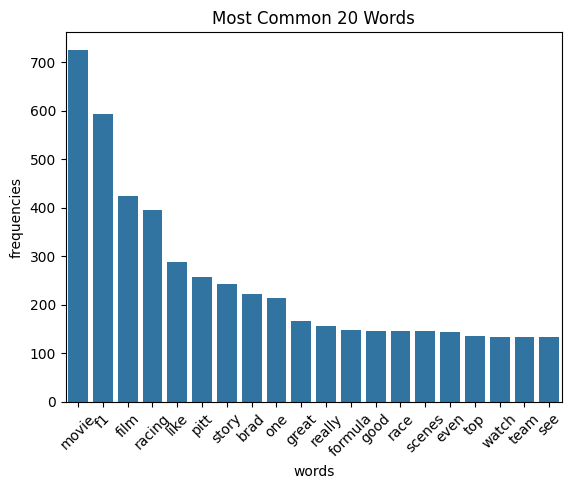

In [72]:
plt.title('Most Common 20 Words')
sns.barplot(data=freq.head(20), x = 'words', y='frequencies')
plt.xticks(rotation=45)
plt.show()

## Lemmatize Reviews

In [73]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 6.7 MB/s eta 0:00:00


In [94]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

True

In [95]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text: str) -> str:
    tokens = text.split()
    lemmas  = [lemmatizer.lemmatize(tok) for tok in tokens]
    return " ".join(lemmas)

In [96]:
df["Reviews Lemmatized"] = df["Reviews No Stopwords"].apply(lemmatize_text)

In [98]:
df.head()

,Reviews,Word Count,Stopwords Count,Reviews Lower,Reviews Nopunct,Reviews No Stopwords,Reviews Lemmatized
0,"Firstly, the music. Oh boy!I came expecting en...",297,93,"firstly, the music. oh boy!i came expecting en...",firstly the music oh boyi came expecting engin...,firstly music oh boyi came expecting engine ro...,firstly music oh boyi came expecting engine ro...
1,...and I went into this expecting a Hollywood ...,123,52,...and i went into this expecting a hollywood ...,and i went into this expecting a hollywood mov...,went expecting hollywood movie thrilling enter...,went expecting hollywood movie thrilling enter...
2,F1 has you on the edge of your seat 100% of th...,109,44,f1 has you on the edge of your seat 100% of th...,f1 has you on the edge of your seat 100 of the...,f1 edge seat 100 running time long nobody care...,f1 edge seat 100 running time long nobody care...
3,Just got out of the theater. It was a full the...,147,54,just got out of the theater. it was a full the...,just got out of the theater it was a full thea...,got theater full theater got tickets weeks adv...,got theater full theater got ticket week advan...
4,"As a longtime F1 fan, F1: The Movie completely...",155,61,"as a longtime f1 fan, f1: the movie completely...",as a longtime f1 fan f1 the movie completely b...,longtime f1 fan f1 movie completely blew away ...,longtime f1 fan f1 movie completely blew away ...


In [100]:
for original, lemmatized in zip(df['Reviews No Stopwords'], df['Reviews Lemmatized']):
    if original != lemmatized:
        print(f"\nOriginal:   {original}")
        print(f"Lemmatized: {lemmatized}")




Original:   firstly music oh boyi came expecting engine roars instead got hans zimmer blasting emotions 300 kmh wasnt prepared concert came theatre formula 1 feel feelings dolby atmos guitars drums laps carscinematography thing marvel atno marvel isnt multiverse motorsport ill give kosinski man knows shoot speed closeups helmet cams pit lane drama smoother lewis soft compoundkosinski pulls expected top gun maverick director brings signature hyperrealbutjustbelievableenough style everything looks slick tension palpable racing feels intense cars look real tracks feel familiar drama soaked cinematic polish maybe bit red bull toonow dear hardcore f1 fans suffer silenceyes yes pit stop timings joke strategy makes sense tyre degradation apparently fictional someone said drs like marvel superpower youll sit physically cringing nonf1 friends lean say omg didnt know formula 1 emotional youll want scream wont youll smile youll nod later youll go straight reddit type furiously find solace thread

# Sentiment Analysis
Doc:

`https://textblob.readthedocs.io/en/dev/quickstart.html`

In [101]:
from textblob import TextBlob

In [104]:
df['polarity'] = df['Reviews Lemmatized'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Reviews Lemmatized'].apply(lambda x: TextBlob(x).sentiment[1])

In [105]:
df.head()

,Reviews,Word Count,Stopwords Count,Reviews Lower,Reviews Nopunct,Reviews No Stopwords,Reviews Lemmatized,polarity,subjectivity
0,"Firstly, the music. Oh boy!I came expecting en...",297,93,"firstly, the music. oh boy!i came expecting en...",firstly the music oh boyi came expecting engin...,firstly music oh boyi came expecting engine ro...,firstly music oh boyi came expecting engine ro...,0.138043,0.471066
1,...and I went into this expecting a Hollywood ...,123,52,...and i went into this expecting a hollywood ...,and i went into this expecting a hollywood mov...,went expecting hollywood movie thrilling enter...,went expecting hollywood movie thrilling enter...,0.429630,0.627778
2,F1 has you on the edge of your seat 100% of th...,109,44,f1 has you on the edge of your seat 100% of th...,f1 has you on the edge of your seat 100 of the...,f1 edge seat 100 running time long nobody care...,f1 edge seat 100 running time long nobody care...,0.306643,0.591026
3,Just got out of the theater. It was a full the...,147,54,just got out of the theater. it was a full the...,just got out of the theater it was a full thea...,got theater full theater got tickets weeks adv...,got theater full theater got ticket week advan...,0.150000,0.451587
4,"As a longtime F1 fan, F1: The Movie completely...",155,61,"as a longtime f1 fan, f1: the movie completely...",as a longtime f1 fan f1 the movie completely b...,longtime f1 fan f1 movie completely blew away ...,longtime f1 fan f1 movie completely blew away ...,0.210034,0.550907


In [107]:
df[['Reviews Lemmatized','polarity','subjectivity']]

,Reviews Lemmatized,polarity,subjectivity
0,firstly music oh boyi came expecting engine ro...,0.138043,0.471066
1,went expecting hollywood movie thrilling enter...,0.429630,0.627778
2,f1 edge seat 100 running time long nobody care...,0.306643,0.591026
3,got theater full theater got ticket week advan...,0.150000,0.451587
4,longtime f1 fan f1 movie completely blew away ...,0.210034,0.550907
...,...,...,...
289,film genre formulaic clicheridden sport sure f...,0.267555,0.454603
290,film spin drive survive mixed campaign scenari...,0.056771,0.376935
291,f1 movie let tell something lifetime ive watch...,0.288235,0.494118
292,movie outstanding film truly exceeded expectat...,0.314947,0.535780


In [109]:
# A positive review with a 0.43 polarity
df.iloc[1]['Reviews']

"...and I went into this expecting a Hollywood movie and thrilling entertainment...it delivered.Look, even die-hard F1 fans have to admit that not every waking moment of a race is fun. This film took elements from race history and used it over the space of nine races. Whether it was Grosjean's fireball, or the moment Senna grabbed the fire extinguisher from the marshal, they took and they used. Yes there were some over the top elements, but what would you prefer? Track limit arguments?Go into this expecting a polished action movie with nice nods to F1. I liked it, my kids liked it, and I think if you go in not expecting an Oscar winning movie, or a masterpiece, it is a fine watch."

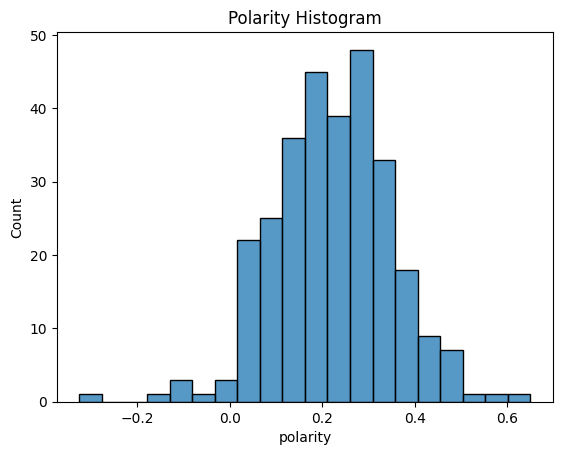

In [113]:
plt.title('Polarity Histogram')
sns.histplot(data = df, x = 'polarity')
plt.show()

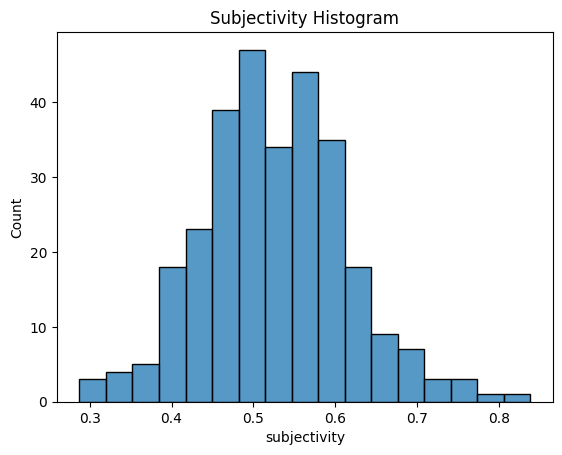

In [114]:
plt.title('Subjectivity Histogram')
sns.histplot(data = df, x = 'subjectivity')
plt.show()

In [118]:
df[df['polarity']>=0.6]

,Reviews,Word Count,Stopwords Count,Reviews Lower,Reviews Nopunct,Reviews No Stopwords,Reviews Lemmatized,polarity,subjectivity
39,It has been a long time since I saw a movie in...,126,60,it has been a long time since i saw a movie in...,it has been a long time since i saw a movie in...,long time since saw movie cinema captivated en...,long time since saw movie cinema captivated en...,0.65,0.838333


In [119]:
# Another positive review
df.iloc[39]['Reviews']

"It has been a long time since I saw a movie in the cinema that captivated me for the entire movie and I couldn't take my eyes off the screen because of the wonderful performance by actor Brad Pitt. I stand in respect for this great actor. The story is also wonderful, as if you are in the Formula One, and the directing was wonderful, and the young actors were all wonderful, but Brad Pitt was beyond expectations in this movie. He is more than wonderful, an actor I respect and love, and I hope his wonderful performance continues. The actress was also wonderful, the atmosphere was beautiful, and the end of the movie was exciting and thrilling, to entertain you and make you feel ecstatic."

In [123]:
df[df['polarity']<-0.2]

,Reviews,Word Count,Stopwords Count,Reviews Lower,Reviews Nopunct,Reviews No Stopwords,Reviews Lemmatized,polarity,subjectivity
207,All the hype around this film is of very poor ...,185,79,all the hype around this film is of very poor ...,all the hype around this film is of very poor ...,hype around film poor taste brads acting terri...,hype around film poor taste brad acting terrib...,-0.325595,0.549405


In [124]:
# A negative review
df.iloc[207]['Reviews']

"All the hype around this film is of very poor taste. Brads acting was terrible, as most of his films, always the same 'I'm in control-smirk', this role has Tom cruise written all over it really but alas..\nThe worst racing film Ive ever seen, and this beside the fact that Ive watched F1 for the last 37years, and the movie in now way portrays the life of F1 drivers or teams... not even the racing scenes feel real not could i feel the speed. What.. a bad script.. I mean.. how dare they. And the length of the film... my god the length. This is by far the worst movie Ive seen in the last couple of years. Its a waste of your popcorn money kids..\nThe movie shouldve been called 'How a terrible actor cant hide the fact he's terrible with a terrible script, and somehow win in the most competitive, technical and high-discipline sports in the world by being too cool for school'.If this was a attempt to dumb down f1 for the world (nascar fans...).. well.. they even failed at that."